# Capstone #2: Data Wrangling<a id='Data_wrangling'></a>

<div style="text-align: right"><i><font size="2"> by: <a href="https://www.linkedin.com/in/sonjoy-das-9b323213/" target="_parent">Sonjoy Das, PhD</a></font></i></div>

This notebook contains the steps related to Data Wrangling and the necessary explanations.

## 2.1 Imports<a id='2.1_Imports'></a>

In [1]:
# Import the necessary libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For "findSubfolder_files(folder_path)" function
from pathlib import Path

# For "find_imageSize(p_subfolder)" function
from PIL import Image
import glob

## 2.2 Explore Image Files and Subdirectories of Input Data<a id='2.2_Image_Files_and_Subdirectories_of_Input_Data'></a>

Here, let us explore how many image files are there and their image sizes, etc.

### 2.2.1 Input Directory Structure<a id='2.2.1_Input_Directory_Structure'></a>

The dataset is available to download from Kaggle, https://www.kaggle.com/tommyngx/kneeoa/tasks. Download the dataset and include the path below.

In [2]:
# Training folder
train_folder = '../KneeXrayKaggle/train'

# Validation folder
val_folder = '../KneeXrayKaggle/val'

# Test folder
test_folder = '../KneeXrayKaggle/test'

# Autotest folder
autotest_folder = '../KneeXrayKaggle/auto_test'

### 2.2.2 Image Labels and Sizes<a id='2.2.2_Image_Labels_and_Sizes'></a>

In [3]:
# Define a function to query subfolders of a folder and the files in them

def findSubfolder_files(folder_path):
    p = Path(folder_path)
    p_subfolder = [(x, len(list(Path(str(x)).glob('*.*')))) for x in p.iterdir() if x.is_dir()]
    p_subfolder = sorted(p_subfolder)

    print(pd.DataFrame(p_subfolder, columns = ['Subfolder', '# of images']))

    image_count = sum([i[1] for i in p_subfolder])
    print('Total files: ' + str(image_count))
    
    return image_count, p_subfolder


In [4]:
train_image_count, train_subfolder = findSubfolder_files(train_folder)

                   Subfolder  # of images
0  ../KneeXrayKaggle/train/0         2286
1  ../KneeXrayKaggle/train/1         1046
2  ../KneeXrayKaggle/train/2         1516
3  ../KneeXrayKaggle/train/3          757
4  ../KneeXrayKaggle/train/4          173
Total files: 5778


In [5]:
val_image_count, val_subfolder = findSubfolder_files(val_folder)

                 Subfolder  # of images
0  ../KneeXrayKaggle/val/0          328
1  ../KneeXrayKaggle/val/1          153
2  ../KneeXrayKaggle/val/2          212
3  ../KneeXrayKaggle/val/3          106
4  ../KneeXrayKaggle/val/4           27
Total files: 826


In [6]:
test_image_count, test_subfolder  = findSubfolder_files(test_folder)

                  Subfolder  # of images
0  ../KneeXrayKaggle/test/0          639
1  ../KneeXrayKaggle/test/1          296
2  ../KneeXrayKaggle/test/2          447
3  ../KneeXrayKaggle/test/3          223
4  ../KneeXrayKaggle/test/4           51
Total files: 1656


In [7]:
autotest_image_count, autotest_subfolder  = findSubfolder_files(autotest_folder)

                       Subfolder  # of images
0  ../KneeXrayKaggle/auto_test/0          604
1  ../KneeXrayKaggle/auto_test/1          275
2  ../KneeXrayKaggle/auto_test/2          403
3  ../KneeXrayKaggle/auto_test/3          200
4  ../KneeXrayKaggle/auto_test/4           44
Total files: 1526


Names of different subfolders and total number of files for each directory are printed above. We will verify later if all of them are image files and which format they are in!

In [8]:
# Define a function to find out the range of sizes of images in folder with many subfolders

# The size determined here will be used as an input to load the images later through 
# tf.keras.preprocessing.image_dataset_from_directory()

def find_imageSize(p_subfolder):
    image_list = []
    image_sizeX = []
    image_sizeY = []
    total_files = 0
    # for filename in glob.glob('yourpath/*.gif'): #assuming gif
    for i in range(len(p_subfolder)):
        # Specify .png format explicitly. This will verify if all image files 
        # are indeed in .png format
        for filename in glob.glob(str(p_subfolder[i][0]) + '/*.png'): 
            total_files += 1
            im=Image.open(filename)
            image_sizeX.append(im.size[0])
            image_sizeY.append(im.size[1])
            image_list.append(im)
            im.close()

    print('Total image files in .png format: ' + str(total_files))

    maxX = max(image_sizeX)
    minX = min(image_sizeX)
    maxY = max(image_sizeY)
    minY = min(image_sizeY)

    return maxX, minX, maxY, minY


In [9]:
# For training set of images
maxXtrain, minXtrain, maxYtrain, minYtrain = find_imageSize(train_subfolder)
print((maxXtrain,minXtrain), (maxYtrain,minYtrain))

Total image files in .png format: 5778
(224, 224) (224, 224)


In [10]:
# For validation set of images
maxXval, minXval, maxYval, minYval = find_imageSize(val_subfolder)
print((maxXval,minXval), (maxYval,minYval))

Total image files in .png format: 826
(224, 224) (224, 224)


In [11]:
# For test set of images
maxXtest, minXtest, maxYtest, minYtest = find_imageSize(test_subfolder)
print((maxXtest,minXtest), (maxYtest,minYtest))

Total image files in .png format: 1656
(224, 224) (224, 224)


In [12]:
# For autotest set of images
maxXautotest, minXautotest, maxYautotest, minYautotest = find_imageSize(autotest_subfolder)
print((maxXautotest,minXautotest), (maxYautotest,minYautotest))

Total image files in .png format: 1526
(224, 224) (224, 224)


So, we verfied that all the files are image files and in .png format. And, sizes of all the images are (224, 224). We will use this image size as an input below in `tf.keras.preprocessing.image_dataset_from_directory()`. 

By the way, I found `tf.keras.preprocessing.image_dataset_from_directory()` to be more appealing than other methods to create image input pipelines. After my investigation, I bumped into this tutorial which also claims the same (in absence of TPU): https://towardsdatascience.com/what-is-the-best-input-pipeline-to-train-image-classification-models-with-tf-keras-eb3fe26d3cc5.

## 2.3 Load Image Dataset<a id='2.3_Load_Image_Dataset'></a>

In [13]:
# Define a function to load all the images in a folder with many subfolders, where
# each subfolder contains images of a specific class.

def load_images(rootfolder_path, batch_size, image_size, validation_split):
    all_images = tf.keras.preprocessing.image_dataset_from_directory(
        directory = rootfolder_path,
        labels="inferred",
        label_mode="int",
        class_names=None,
        color_mode="rgb",
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True,
        seed=1,
        validation_split=validation_split,
        subset=None,
        interpolation="bilinear",
        follow_links=False,
        smart_resize = False
    )
    return all_images


In [14]:
# Input parameters to load training set of images
train_batch_size = 32
train_image_size=(maxXtrain, maxYtrain)
validation_split=None # This will be same for other sets of images.

# Load the training set of images
train_images = load_images(train_folder,train_batch_size,train_image_size,validation_split)

Found 5778 files belonging to 5 classes.


In [15]:
# Input parameters to load validation set of images
val_batch_size = 32
val_image_size=(maxXval, maxYval)

# Load the validation set of images
val_images = load_images(val_folder,val_batch_size,val_image_size,validation_split)

Found 826 files belonging to 5 classes.


In [16]:
# Input parameters to load test set of images
test_batch_size = 32
test_image_size=(maxXtest, maxYtest)

# Load the test set of images
test_images = load_images(test_folder,test_batch_size,test_image_size,validation_split)

Found 1656 files belonging to 5 classes.


In [17]:
# Input parameters to load autotest set of images
autotest_batch_size = 32
autotest_image_size=(maxXautotest, maxYautotest)

# Load the test set of images
autotest_images = load_images(autotest_folder,autotest_batch_size,autotest_image_size,validation_split)

Found 1526 files belonging to 5 classes.


In [18]:
# Define a function to check the sizes of the images that are **loaded**

def check_loadedImagesize(all_images,setType):
    for image_batch, labels_batch in all_images:
        print(setType)
        print(image_batch.shape)
        print(labels_batch.shape)
        print("\n")
        break
        

In [19]:
# Check if the size of images loaded through function `load_images()` are what we determined 
# earlier through function find_imageSize()

check_loadedImagesize(train_images,'Training set:')
check_loadedImagesize(val_images,'Validation set:')
check_loadedImagesize(test_images,'Test set:')
check_loadedImagesize(autotest_images,'Autotest set:')

Training set:
(32, 224, 224, 3)
(32,)


Validation set:
(32, 224, 224, 3)
(32,)


Test set:
(32, 224, 224, 3)
(32,)


Autotest set:
(32, 224, 224, 3)
(32,)




Here, 32 is batch size, image size is (224, 224, 3) in which the last dimension (i.e., 3) referes to color channels RGB. See: https://www.tensorflow.org/tutorials/load_data/images and https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

## 2.4 Distribution of KL Gradings of Images<a id='2.4_Distribution_of_KL_Grading_of_Images'></a>

In [20]:
# Define a function to determine the frequencies of KL grading of differennt images **THAT** 
# ARE LOADED

def findFrequenciesKLgrading(all_images,number_of_batches):
    KL_values = []
    iterator = iter(all_images)

    for i in range(number_of_batches):
        _, labels = next(iterator)
        labels = labels.numpy().astype("int")
        KL_values = np.concatenate((KL_values, labels), axis=None)

    # Convert labels_all to integer type for nice printing
    KL_values = KL_values.astype("int")

    (unique_values, counts) = np.unique(KL_values, return_counts=True)
    frequencies = np.asarray((unique_values, counts)).T
    print(pd.DataFrame(frequencies, columns = ['KL Grading', '# of images']).set_index('KL Grading'))
    
    return frequencies
    

In [21]:
# Determine and print out the frequencies of KL grading of **LOADED** images to verify if 
# they are same as we have seen earlier while querying subfolders of train/val/test/autotest
# folder

# Training Images:

# Ceiling division or upside-down floor division [or math.ceil operation without importing math module]
number_of_trainBatches = -(-train_image_count//train_batch_size)

print('Number of training batches: ' + str(number_of_trainBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** training images
train_KLfrequencies = findFrequenciesKLgrading(train_images,number_of_trainBatches)


Number of training batches: 181


            # of images
KL Grading             
0                  2286
1                  1046
2                  1516
3                   757
4                   173


In [22]:
# Validation Images:
number_of_valBatches = -(-val_image_count//val_batch_size)

print('Number of validation batches: ' + str(number_of_valBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** validation images
val_KLfrequencies = findFrequenciesKLgrading(val_images,number_of_valBatches)


Number of validation batches: 26


            # of images
KL Grading             
0                   328
1                   153
2                   212
3                   106
4                    27


In [23]:
# Test Images:
number_of_testBatches = -(-test_image_count//test_batch_size)

print('Number of test batches: ' + str(number_of_testBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** test images
test_KLfrequencies = findFrequenciesKLgrading(test_images,number_of_testBatches)


Number of test batches: 52


            # of images
KL Grading             
0                   639
1                   296
2                   447
3                   223
4                    51


In [24]:
# Autotest Images:
number_of_autotestBatches = -(-autotest_image_count//autotest_batch_size)

print('Number of autotest batches: ' + str(number_of_autotestBatches))
print("\n")
# Print out the frequencies of KL grading of **LOADED** test images
autotest_KLfrequencies = findFrequenciesKLgrading(autotest_images,number_of_autotestBatches)


Number of autotest batches: 48


            # of images
KL Grading             
0                   604
1                   275
2                   403
3                   200
4                    44


Everything looks good! The frequencies of KL grading of **LOADED** train/val/test/autotest images are indeed same as we have seen earlier while querying the number of files in each subfolder of the train/val/test/autotest folders.

**The data is, however, imbalanced** since there are only a few images for KL Grading = 4 (severe degenerative condition) while there are significantly more images available for the rest of the other conditions. Let us plot them as well.

In [25]:
# Define a function to do a bar plot of frequencies of the KL grading
#

def barPlot_KLgrading(ax,frequencies,title):
    color = ['green', 'yellow', 'orange', 'red', 'darkred']
#    fig, ax = plt.subplot(tight_layout=True)

    ax.bar(frequencies[:,0],frequencies[:,1],color =color)
    ax.set_ylabel('Count',fontsize=12,fontfamily = 'serif')
    ax.set_title(title,fontsize=14,fontfamily = 'serif')
    
    x_labels = ax.get_xticklabels()
    
    ax.set_xticks((0,1,2,3,4))
    ax.set_xticklabels(KL_grading,fontsize=12,fontfamily = 'serif', color='blue', rotation=30)
    
    ax.set_ylim([0, 2500])
    

In [26]:
KL_grading = ['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']
print(KL_grading)

['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']


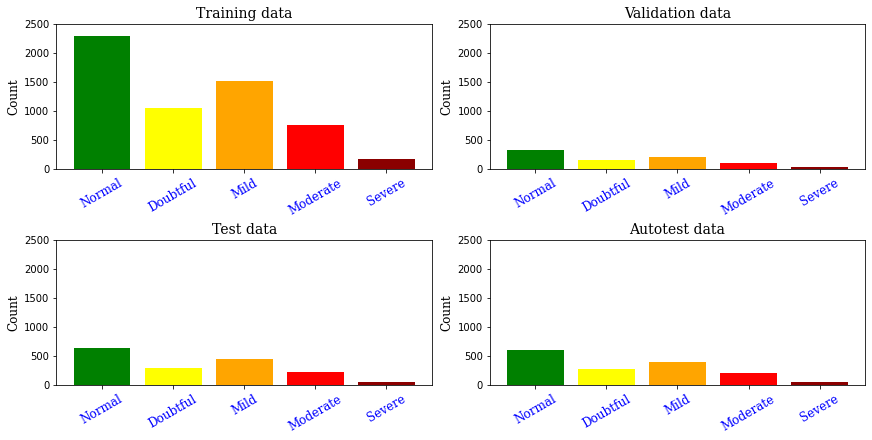

In [27]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 6))

ax = iter(axs.flat)
barPlot_KLgrading(next(ax),train_KLfrequencies,'Training data')
barPlot_KLgrading(next(ax),val_KLfrequencies,'Validation data')
barPlot_KLgrading(next(ax),test_KLfrequencies,'Test data')
barPlot_KLgrading(next(ax),autotest_KLfrequencies,'Autotest data')


Here, out of these 4 imbalanced datasets (`train`, `validation`, `test`, and `autotest`), we will essentially need the datasets of train, validation, and test to build a predictive deep learning model for this project. Therefore, we will use the `autotest` dataset as well in building the predictive model. There are typically a few ways to do it. See https://machinelearningmastery.com/update-neural-network-models-with-more-data/ for more details. We plan to consider one or a few of these approaches to incorporate `autotest` dataset in the predictive model.

## 2.5 Display of Images<a id='2.5_Display_of_Images'></a>

Before dealing with **imbalancedness of the datasets**, let us display a few representative images of different KL grading below. We will simply use the training set of images for this purpose.

In [28]:
train_class_names = train_images.class_names
print(train_class_names)

['0', '1', '2', '3', '4']


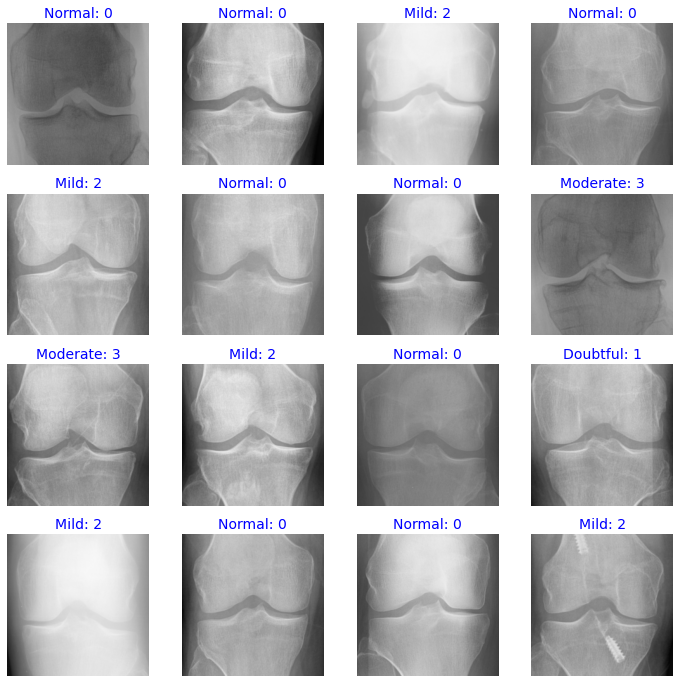

In [29]:
plt.figure(figsize=(12, 12))
for images, labels in train_images.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(KL_grading[labels[i]]+': '+train_class_names[labels[i]],color='blue', fontsize=14)
        plt.axis("off")


## 2.6 Remarks on Imbalanced Image Dataset<a id='2.6_Remarks_on_Imbalanced_Image_Dataset'></a>

To deal with this imbalanced dataset of images, we will employ **Synthetic Minority Oversampling Technique**, or **SMOTE**. See https://arxiv.org/abs/1106.1813 for more technical details. See https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ for a short tutorial article on SMOTE. SMOTE is essentially an oversampling technique that generates synthetic samples from the minority class. **It is applied only in training dataset** not on validation dataset or test dataset. SMOTE helps to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

However, the original SMOTE approach is applicable only for tabular data or where the dimension of data is <= 2. To apply SMOTE on imbalanced image dataset, we possibly need to `reshape` our X_train and X_smote depending upon our approach or implementation adopted as indicated in a few places such as https://medium.com/swlh/how-to-use-smote-for-dealing-with-imbalanced-image-dataset-for-solving-classification-problems-3aba7d2b9cad, or https://stackoverflow.com/questions/53666759/use-smote-to-oversample-image-data, or https://datascience.stackexchange.com/questions/62759/how-do-i-run-smote-on-image-data-using-the-packages-available. 

**SMOTE is used** after scaling data etc., i.e., **after `Data Processing`** stage and **before `Training Data`** stage. Therefore, we will stop here to mark the completion of this current **Data Wrangling** stage.
